# Bird‑phrase clustering – result exploration
Interactive notebook that reproduces the quick‑look analyses & plots we discussed.
Just run the cells top‑to‑bottom (or use **`Run All`**) — feel free to tweak paths or add new views.

In [1]:

import hashlib, textwrap
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# prettier, wider tables in notebooks
pd.set_option('display.max_columns', None)
plt.rcParams['figure.dpi'] = 110  # crisper on HiDPI
plt.rcParams['savefig.bbox'] = 'tight'

CORE_COLS = [
    'n_components', 'n_neighbors', 'min_dist', 'metric',
    'min_cluster_size', 'min_samples', 'smoothing_window'
]  # random_state is fixed (42)

def make_config_key(row, cols=CORE_COLS):
    """Short reproducible hash for a config row."""
    tup = tuple(row[c] for c in cols)
    return hashlib.md5(str(tup).encode()).hexdigest()[:10]

def deduplicate_columns(df: pd.DataFrame) -> pd.DataFrame:
    """Remove '.1', '.2' duplicates (keep the first occurrence)."""
    _, first_pos = np.unique(df.columns, return_index=True)
    return df.iloc[:, np.sort(first_pos)]


In [3]:

# ⇩⇩  EDIT: point to your CSV  ⇩⇩
csv_path = Path('/home/george-vengrovski/Documents/projects/tweety_bert_paper/full_search_V1_1M/full_grid_search_ALL_RESULTS_1000k.csv')

df_raw = pd.read_csv(csv_path)
df = deduplicate_columns(df_raw.copy())
df['config_key'] = df.apply(make_config_key, axis=1)

metric = 'total_fer'
df = df[df[metric].notna()].sort_values(metric)

print(f'Loaded {len(df):,} rows from {csv_path.name}')
df.head()


Loaded 972 rows from full_grid_search_ALL_RESULTS_1000k.csv


,fold_path_str,n_components,n_neighbors,min_dist,metric,random_state,min_cluster_size,min_samples,smoothing_window,total_fer,v_measure,total_fer.1,matched_fer,macro_fer,time_umap,time_hdbscan,time_eval_block_all_smoothing,oom_flag_umap,oom_flag_hdbscan,error_message,config_key
211,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,32,150,0.25,cosine,42,500,50,0,3.978011,0.930422,3.978011,3.978011,14.223519,13.045337,8.349720,7.907830,False,False,NaN,e84fe270f9
205,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,32,150,0.10,cosine,42,500,50,0,4.028811,0.929690,4.028811,4.028811,15.062978,13.031841,9.336579,5.279301,False,False,NaN,5821ee01b1
381,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,8,50,0.25,cosine,42,2500,50,0,4.052330,0.906711,4.052330,3.070700,30.288182,7.282064,8.324566,7.228325,False,False,NaN,13b5741747
375,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,8,50,0.10,cosine,42,2500,50,0,4.222823,0.903217,4.222823,3.242938,30.394335,7.347902,8.085521,4.812119,False,False,NaN,4e8ad9769e
213,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,32,150,0.25,cosine,42,2500,50,0,4.228038,0.915059,4.228038,2.406126,26.318407,13.045337,8.386790,9.825535,False,False,NaN,ac76822e8b


In [5]:
top_rows = 15
display_cols = ['fold_path_str', *CORE_COLS, metric,
                'v_measure', 'macro_fer']
print('Top rows (lowest FER):')
display(df[display_cols].head(top_rows))


Top rows (lowest FER):


,fold_path_str,n_components,n_neighbors,min_dist,metric,min_cluster_size,min_samples,smoothing_window,total_fer,v_measure,macro_fer
211,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,32,150,0.25,cosine,500,50,0,3.978011,0.930422,14.223519
205,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,32,150,0.10,cosine,500,50,0,4.028811,0.929690,15.062978
381,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,8,50,0.25,cosine,2500,50,0,4.052330,0.906711,30.288182
375,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,8,50,0.10,cosine,2500,50,0,4.222823,0.903217,30.394335
213,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,32,150,0.25,cosine,2500,50,0,4.228038,0.915059,26.318407
80,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,32,15,0.25,cosine,2500,5,0,4.244451,0.913776,29.653368
177,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,8,150,0.25,cosine,2500,50,0,4.253296,0.915078,26.344460
374,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,8,50,0.10,cosine,2500,5,0,4.295850,0.901994,30.635796
195,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,32,50,0.10,cosine,2500,50,0,4.312043,0.919545,25.965281
207,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,32,150,0.10,cosine,2500,50,0,4.321408,0.912986,26.362422


In [6]:

best_per_fold = (df.loc[df.groupby('fold_path_str')[metric].idxmin()]
                   .sort_values(metric)
                   .reset_index(drop=True))
print('Best config per fold:')
display(best_per_fold[['fold_path_str', metric, *CORE_COLS]])


Best config per fold:


,fold_path_str,total_fer,n_components,n_neighbors,min_dist,metric,min_cluster_size,min_samples,smoothing_window
0,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,3.978011,32,150,0.25,cosine,500,50,0
1,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,4.052330,8,50,0.25,cosine,2500,50,0
2,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,4.244451,32,15,0.25,cosine,2500,5,0
3,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,5.873827,8,50,0.10,cosine,2500,50,0
4,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,5.966228,32,50,0.10,cosine,5000,50,0
5,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,6.317848,8,50,0.25,cosine,2500,50,0
6,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,6.555398,8,50,0.10,cosine,5000,50,0
7,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,9.012840,8,50,0.10,cosine,2500,5,0
8,/media/george-vengrovski/Desk SSD/TweetyBERT_Z...,11.260639,8,150,0.25,cosine,500,5,0


In [7]:
mean_cfg = (df.groupby('config_key')[metric]
              .mean()
              .sort_values()
              .to_frame('mean_'+metric)
              .reset_index())
lookup = df.drop_duplicates('config_key').set_index('config_key')[CORE_COLS]
mean_cfg = mean_cfg.join(lookup, on='config_key')

print('Mean FER by config (top 15):')
display(mean_cfg.head(15))

# Mean macro FER by config
mean_cfg_macro = (df.groupby('config_key')['macro_fer']
                    .mean()
                    .sort_values()
                    .to_frame('mean_macro_fer')
                    .reset_index())
mean_cfg_macro = mean_cfg_macro.join(lookup, on='config_key')

print('Mean Macro FER by config (top 15):')
display(mean_cfg_macro.head(15))

# Mean v_measure by config
mean_cfg_vmeasure = (df.groupby('config_key')['v_measure']
                       .mean()
                       .sort_values(ascending=False)
                       .to_frame('mean_v_measure')
                       .reset_index())
mean_cfg_vmeasure = mean_cfg_vmeasure.join(lookup, on='config_key')

print('Mean V-Measure by config (top 15):')
display(mean_cfg_vmeasure.head(15))


Mean FER by config (top 15):


,config_key,mean_total_fer,n_components,n_neighbors,min_dist,metric,min_cluster_size,min_samples,smoothing_window
0,f45d3c5bb2,9.551062,8,50,0.10,cosine,5000,50,0
1,8c719e323d,9.711251,32,15,0.25,cosine,5000,50,0
2,72a032383e,9.739006,32,50,0.10,cosine,5000,50,0
3,f23729b98b,9.996543,8,50,0.25,cosine,5000,50,0
4,24510a00e9,10.191810,8,15,0.25,cosine,2500,50,0
5,79375b5375,10.747514,32,50,0.25,cosine,5000,50,0
6,7b126f5e80,10.827635,8,15,0.25,cosine,5000,50,0
7,a6cc1a058b,11.022597,8,50,0.10,cosine,5000,5,0
8,4e8ad9769e,11.830680,8,50,0.10,cosine,2500,50,0
9,a46e61881b,12.185990,32,15,0.25,cosine,2500,50,0


Mean Macro FER by config (top 15):


,config_key,mean_macro_fer,n_components,n_neighbors,min_dist,metric,min_cluster_size,min_samples,smoothing_window
0,e84fe270f9,24.467558,32,150,0.25,cosine,500,50,0
1,5821ee01b1,24.668184,32,150,0.10,cosine,500,50,0
2,d891b97bbe,24.761052,8,150,0.25,cosine,500,50,0
3,f51488659e,25.986535,8,50,0.10,cosine,500,5,0
4,916d833ca3,26.809362,8,50,0.25,cosine,500,50,0
5,7cdbc1495a,26.894961,8,150,0.10,cosine,500,50,0
6,e0cf6df489,27.081373,8,50,0.10,cosine,500,50,0
7,f2b4a4ef1a,27.340278,32,50,0.10,cosine,500,5,0
8,e18e8cc2c0,27.375207,32,50,0.25,cosine,500,50,0
9,4e8ad9769e,27.806596,8,50,0.10,cosine,2500,50,0


Mean V-Measure by config (top 15):


,config_key,mean_v_measure,n_components,n_neighbors,min_dist,metric,min_cluster_size,min_samples,smoothing_window
0,4e8ad9769e,0.912815,8,50,0.10,cosine,2500,50,0
1,13b5741747,0.910586,8,50,0.25,cosine,2500,50,0
2,7f56ec7fff,0.909599,32,50,0.10,cosine,2500,50,0
3,658bbd9442,0.909045,8,50,0.10,cosine,2500,5,0
4,cf9f55f1d9,0.907284,32,50,0.25,cosine,2500,50,0
5,f45d3c5bb2,0.901193,8,50,0.10,cosine,5000,50,0
6,33e5190520,0.901138,32,50,0.10,cosine,2500,5,0
7,6101e3dffd,0.900329,8,150,0.10,cosine,2500,50,0
8,f211803dd6,0.900164,8,150,0.25,cosine,2500,50,0
9,eab6765e54,0.900057,32,150,0.10,cosine,2500,50,0


In [41]:
# Filter to only configs with smoothing_window == 0
lookup_sw0 = lookup[lookup['smoothing_window'] == 0]
sw0_keys = set(lookup_sw0.index)

mean_cfg_sw0 = mean_cfg[mean_cfg['config_key'].isin(sw0_keys)].reset_index(drop=True)
mean_cfg_macro_sw0 = mean_cfg_macro[mean_cfg_macro['config_key'].isin(sw0_keys)].reset_index(drop=True)
mean_cfg_vmeasure_sw0 = mean_cfg_vmeasure[mean_cfg_vmeasure['config_key'].isin(sw0_keys)].reset_index(drop=True)

# 1. extract the ranks for each metric. the index is the rank.
fer_ranks = mean_cfg_sw0[['config_key']].reset_index().rename(columns={'index': 'fer_rank'})
macro_fer_ranks = mean_cfg_macro_sw0[['config_key']].reset_index().rename(columns={'index': 'macro_fer_rank'})
v_measure_ranks = mean_cfg_vmeasure_sw0[['config_key']].reset_index().rename(columns={'index': 'v_measure_rank'})

# 2. merge the ranks into a single dataframe
agg_ranks = fer_ranks.merge(macro_fer_ranks, on='config_key')
agg_ranks = agg_ranks.merge(v_measure_ranks, on='config_key')

# 3. sum the ranks to get the borda score
agg_ranks['total_rank'] = agg_ranks['fer_rank'] + agg_ranks['macro_fer_rank'] + agg_ranks['v_measure_rank']

# 4. sort by the total rank to find the best overall configuration
final_leaderboard = agg_ranks.sort_values('total_rank')

# join with the actual hyperparameter values for interpretability
final_leaderboard = final_leaderboard.join(lookup, on='config_key')

print("Principled Leaderboard using Rank Aggregation (Borda Count) (smoothing_window == 0):")
display(final_leaderboard.head(15))

# Print a second table where the rank columns are replaced with the actual metric values
# Get the actual values for each config_key in the same order as the leaderboard
value_table = final_leaderboard[['config_key']].copy()
value_table = value_table.merge(
    mean_cfg_sw0[['config_key', 'mean_total_fer']], on='config_key', how='left'
).merge(
    mean_cfg_macro_sw0[['config_key', 'mean_macro_fer']], on='config_key', how='left'
).merge(
    mean_cfg_vmeasure_sw0[['config_key', 'mean_v_measure']], on='config_key', how='left'
).set_index(final_leaderboard.index)

# Add hyperparameters for interpretability
value_table = value_table.join(lookup, on='config_key')

print("Leaderboard with actual metric values (smoothing_window == 0):")
display(value_table.head(15))

Principled Leaderboard using Rank Aggregation (Borda Count) (smoothing_window == 0):


,fer_rank,config_key,macro_fer_rank,v_measure_rank,total_rank,n_components,n_neighbors,min_dist,metric,min_cluster_size,min_samples,smoothing_window
8,8,4e8ad9769e,9,0,17,8,50,0.10,cosine,2500,50,0
11,11,13b5741747,11,1,23,8,50,0.25,cosine,2500,50,0
19,19,658bbd9442,16,3,38,8,50,0.10,cosine,2500,5,0
21,21,7f56ec7fff,21,2,44,32,50,0.10,cosine,2500,50,0
4,4,24510a00e9,34,14,52,8,15,0.25,cosine,2500,50,0
0,0,f45d3c5bb2,48,5,53,8,50,0.10,cosine,5000,50,0
9,9,a46e61881b,33,15,57,32,15,0.25,cosine,2500,50,0
24,24,6101e3dffd,28,7,59,8,150,0.10,cosine,2500,50,0
30,30,cf9f55f1d9,27,4,61,32,50,0.25,cosine,2500,50,0
15,15,3fd8647274,25,21,61,32,15,0.10,cosine,2500,50,0


Leaderboard with actual metric values (smoothing_window == 0):


,config_key,mean_total_fer,mean_macro_fer,mean_v_measure,n_components,n_neighbors,min_dist,metric,min_cluster_size,min_samples,smoothing_window
8,4e8ad9769e,11.830680,27.806596,0.912815,8,50,0.10,cosine,2500,50,0
11,13b5741747,12.518458,28.536854,0.910586,8,50,0.25,cosine,2500,50,0
19,658bbd9442,13.509163,28.852291,0.909045,8,50,0.10,cosine,2500,5,0
21,7f56ec7fff,13.806293,29.820771,0.909599,32,50,0.10,cosine,2500,50,0
4,24510a00e9,10.191810,31.484695,0.898405,8,15,0.25,cosine,2500,50,0
0,f45d3c5bb2,9.551062,36.698845,0.901193,8,50,0.10,cosine,5000,50,0
9,a46e61881b,12.185990,31.423567,0.896549,32,15,0.25,cosine,2500,50,0
24,6101e3dffd,13.972160,30.980572,0.900329,8,150,0.10,cosine,2500,50,0
30,cf9f55f1d9,14.668641,30.830371,0.907284,32,50,0.25,cosine,2500,50,0
15,3fd8647274,13.088724,30.430519,0.893318,32,15,0.10,cosine,2500,50,0


In [7]:

rt_cols = ['time_umap', 'time_hdbscan']
rt_stats = pd.DataFrame({
    'mean': df[rt_cols].mean(),
    'median': df[rt_cols].median(),
    'p95': df[rt_cols].quantile(0.95)
}).round(2)
rt_stats


,mean,median,p95
time_umap,43.21,44.08,53.74
time_hdbscan,45.56,44.97,53.64


Random Forest Parameter Importances (mean decrease in impurity):
Minimum Distance        0.007315
Minimum Samples         0.016531
Minimum Cluster Size    0.070437
Neighborhood Size       0.115355
Embedding Dimension     0.790362
dtype: float64
Parameter: Embedding Dimension, Comparison: 2 vs 8
  Mann-Whitney U statistic: 1295.000, p-value (corrected): 9.935e-13 (***)
Parameter: Embedding Dimension, Comparison: 2 vs 32
  Mann-Whitney U statistic: 1296.000, p-value (corrected): 9.131e-13 (***)
Parameter: Embedding Dimension, Comparison: 8 vs 32
  Mann-Whitney U statistic: 605.500, p-value (corrected): 1.909 (ns)
Parameter: Neighborhood Size, Comparison: 15 vs 50
  Mann-Whitney U statistic: 884.500, p-value (corrected): 0.02359 (*)
Parameter: Neighborhood Size, Comparison: 15 vs 150
  Mann-Whitney U statistic: 817.000, p-value (corrected): 0.1732 (ns)
Parameter: Neighborhood Size, Comparison: 50 vs 150
  Mann-Whitney U statistic: 647.500, p-value (corrected): 3 (ns)
Parameter: Minimum Cl

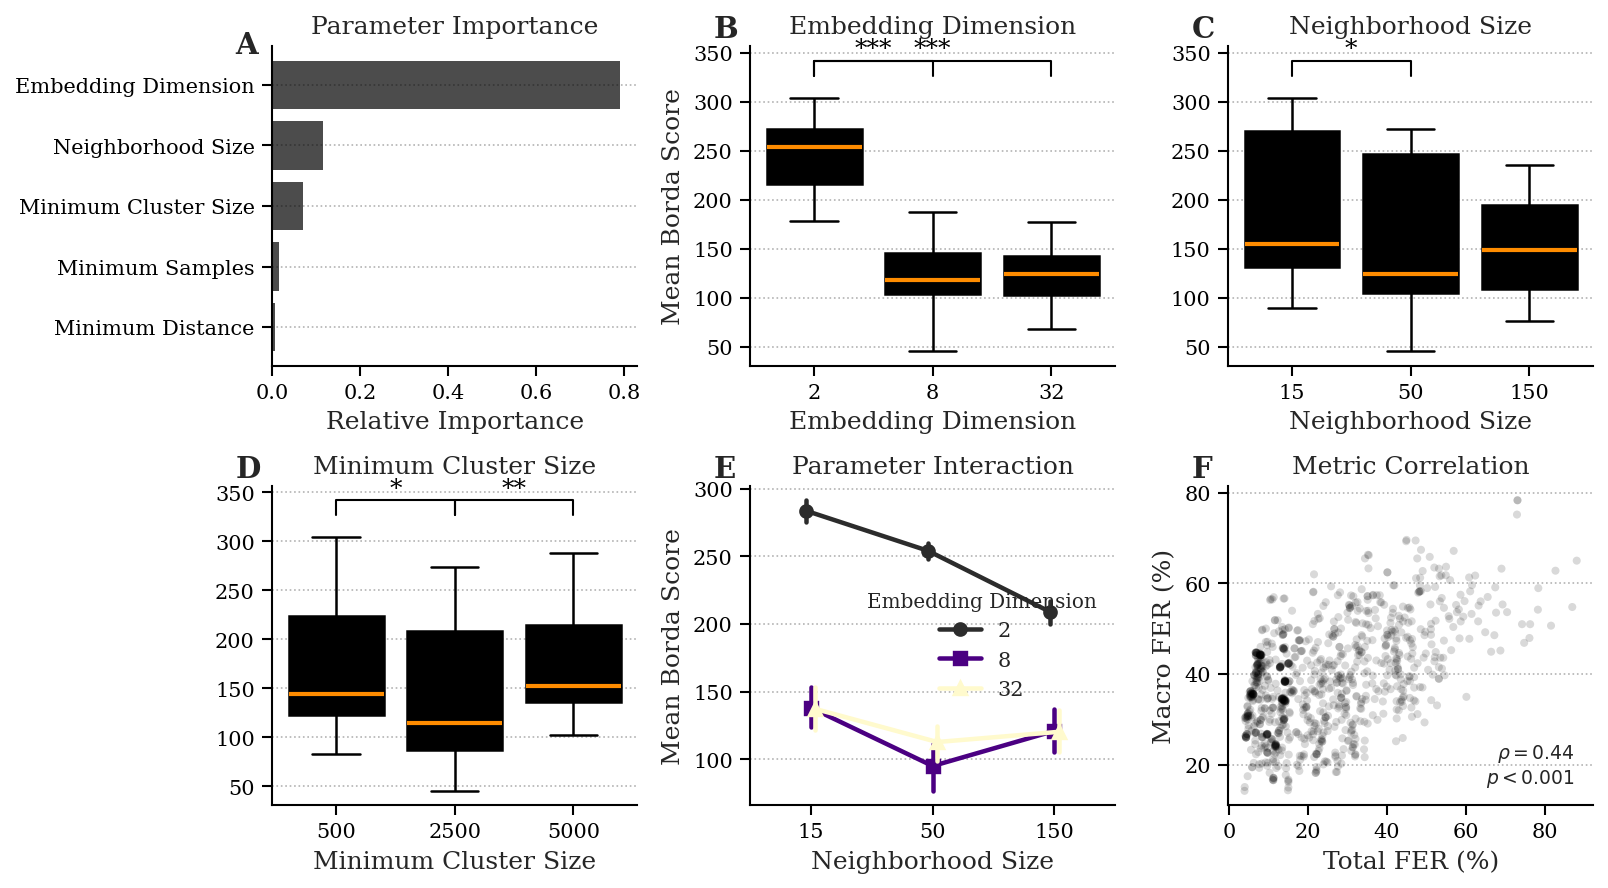

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from scipy.stats import kruskal, mannwhitneyu, spearmanr
import warnings

# --- Setup & Configuration ---
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper")

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'DejaVu Serif', 'Bitstream Vera Serif'],
    'font.size': 10,
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.edgecolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'grid.color': 'grey',
    'grid.linestyle': ':',
    'grid.alpha': 0.5,
    'figure.dpi': 150,
})

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# --- MODIFICATION START: Define publication-ready names for parameters ---
pretty_names = {
    'n_components': 'Embedding Dimension',
    'n_neighbors': 'Neighborhood Size',
    'min_cluster_size': 'Minimum Cluster Size',
    'min_dist': 'Minimum Distance',
    'min_samples': 'Minimum Samples'
}
# --- MODIFICATION END ---


csv_path = Path('/home/george-vengrovski/Documents/projects/tweety_bert_paper/full_search_V1_1M/full_grid_search_ALL_RESULTS_1000k.csv')

# --- Helper Functions ---
def deduplicate_columns(df: pd.DataFrame) -> pd.DataFrame:
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [dup + '.' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
    df = df.loc[:,~df.columns.duplicated(keep='first')]
    return df

def make_config_key(row: pd.Series) -> str:
    param_cols = ['n_components', 'n_neighbors', 'min_dist', 'metric', 'random_state', 'min_cluster_size', 'min_samples', 'smoothing_window']
    key_str = "_".join(f"{col}:{row[col]}" for col in param_cols)
    return key_str

def p_to_stars(p_val):
    if p_val < 0.001: return '***'
    if p_val < 0.01: return '**'
    if p_val < 0.05: return '*'
    return 'ns'

def add_stat_annotation(ax, x1, x2, data, y_col, p_val):
    y_max = data[y_col].max()
    h = y_max * 0.05
    y = y_max + h * 1.5
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.0, c='k')
    ax.text((x1+x2)*.5, y+h, p_to_stars(p_val), ha='center', va='bottom', color='k', fontsize=12)

# --- Data Loading and Pre-processing ---
if not csv_path.exists():
    raise FileNotFoundError(f"CSV not found: {csv_path}. Please update the path.")

df_raw = pd.read_csv(csv_path)
df = deduplicate_columns(df_raw.copy())
relevant_cols = ['fold_path_str', 'n_components', 'n_neighbors', 'min_dist', 'metric', 'random_state', 'min_cluster_size', 'min_samples', 'smoothing_window', 'total_fer', 'v_measure', 'macro_fer']
df = df[relevant_cols].dropna()
df['config_key'] = df.apply(make_config_key, axis=1)

# --- Borda Score Calculation ---
df['rank_fer'] = df.groupby('fold_path_str')['total_fer'].rank(method='first', ascending=True)
df['rank_macro_fer'] = df.groupby('fold_path_str')['macro_fer'].rank(method='first', ascending=True)
df['rank_v_measure'] = df.groupby('fold_path_str')['v_measure'].rank(method='first', ascending=False)
df['borda_score'] = df['rank_fer'] + df['rank_macro_fer'] + df['rank_v_measure']

# --- Aggregate Data ---
agg_df = df.groupby('config_key').agg({
    'n_components': 'first', 'n_neighbors': 'first', 'min_dist': 'first', 'metric': 'first',
    'min_cluster_size': 'first', 'min_samples': 'first', 'smoothing_window': 'first',
    'borda_score': 'mean', 'total_fer': 'mean', 'macro_fer': 'mean', 'v_measure': 'mean'
}).reset_index()

# --- Generate Compact 2x3 Panel ---
fig, axs = plt.subplots(2, 3, figsize=(10.8, 6.0))
panel_label_props = dict(fontsize=14, fontweight='bold', ha='left', va='top')

# --- Panel A: Parameter Importance ---
features_df = agg_df.drop(columns=['config_key', 'borda_score', 'total_fer', 'macro_fer', 'v_measure'])
# --- MODIFICATION START: Drop non-tuned / unimportant parameters ---
features_to_drop = ['smoothing_window', 'metric']
features_df.drop(columns=features_to_drop, inplace=True)
# --- MODIFICATION END ---

for col in features_df.select_dtypes(include=['object']).columns:
    features_df[col] = LabelEncoder().fit_transform(features_df[col])
target = agg_df['borda_score']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features_df, target)
importances = pd.Series(model.feature_importances_, index=features_df.columns).sort_values()

# --- MODIFICATION START: Rename index to pretty names before plotting ---
importances.rename(index=pretty_names, inplace=True)
# --- MODIFICATION END ---
axs[0, 0].barh(importances.index, importances.values, color='k', alpha=0.7)
axs[0, 0].set_xlabel('Relative Importance')
axs[0, 0].set_title('Parameter Importance')
axs[0, 0].text(-0.1, 1.05, 'A', transform=axs[0, 0].transAxes, **panel_label_props)

# Print parameter importances
print("Random Forest Parameter Importances (mean decrease in impurity):")
print(importances)

# --- Panels B-D: Boxplots for Top Significant Parameters ---
significant_params = ['n_components', 'n_neighbors', 'min_cluster_size']
param_axes = {'n_components': axs[0, 1], 'n_neighbors': axs[0, 2], 'min_cluster_size': axs[1, 0]}
panel_letters = {'n_components': 'B', 'n_neighbors': 'C', 'min_cluster_size': 'D'}

for param in significant_params:
    ax = param_axes[param]
    # --- MODIFICATION START: Use pretty names for titles and labels ---
    param_title = pretty_names.get(param, param)
    sns.boxplot(ax=ax, data=agg_df, x=param, y='borda_score', color='black', fliersize=2, linewidth=1.2, medianprops={"color": "#ff8c00", "linewidth": 2})
    ax.set_ylabel('Mean Borda Score' if param == 'n_components' else '')
    ax.set_xlabel(param_title)
    ax.set_title(param_title)
    # --- MODIFICATION END ---
    ax.text(-0.1, 1.1, panel_letters[param], transform=ax.transAxes, **panel_label_props)

    groups = [data['borda_score'].values for name, data in agg_df.groupby(param)]
    unique_vals = sorted(agg_df[param].unique())
    comparisons = [(0, 1), (0, 2), (1, 2)]
    num_comparisons = len(comparisons)
    for i, j in comparisons:
        stat, p = mannwhitneyu(groups[i], groups[j], alternative='two-sided')
        p_corrected = p * num_comparisons
        if p_corrected < 0.05:
            add_stat_annotation(ax, i, j, agg_df, 'borda_score', p_corrected)
        # Print stats for each comparison
        print(f"Parameter: {param_title}, Comparison: {unique_vals[i]} vs {unique_vals[j]}")
        print(f"  Mann-Whitney U statistic: {stat:.3f}, p-value (corrected): {p_corrected:.4g} ({p_to_stars(p_corrected)})")

# --- Panel E: Interaction Plot ---
ax_e = axs[1, 1]
interaction_palette = ['#2c2c2c', '#4b0082', '#fffacd']
sns.pointplot(ax=ax_e, data=agg_df, x='n_neighbors', y='borda_score', hue='n_components', palette=interaction_palette, dodge=True, markers=['o', 's', '^'])
# --- MODIFICATION START: Use pretty names for labels and legend ---
ax_e.set_xlabel(pretty_names['n_neighbors'])
ax_e.set_ylabel('Mean Borda Score')
ax_e.set_title('Parameter Interaction')
ax_e.legend(title=pretty_names['n_components'])
# --- MODIFICATION END ---
ax_e.text(-0.1, 1.1, 'E', transform=ax_e.transAxes, **panel_label_props)

# Print group means for interaction plot
print("\nInteraction Plot Group Means (by Neighborhood Size and Embedding Dimension):")
interaction_means = agg_df.groupby(['n_neighbors', 'n_components'])['borda_score'].mean().unstack()
print(interaction_means)

# --- Panel F: Metric Correlation (total_fer vs macro_fer) ---
ax_f = axs[1, 2]
sns.scatterplot(ax=ax_f, data=df, x='total_fer', y='macro_fer', alpha=0.15, s=15, color='k', edgecolor='none')
ax_f.set_title('Metric Correlation')
ax_f.set_xlabel('Total FER (%)')
ax_f.set_ylabel('Macro FER (%)')
ax_f.text(-0.1, 1.1, 'F', transform=ax_f.transAxes, **panel_label_props)
rho, p_rho = spearmanr(df['total_fer'], df['macro_fer'])
p_text_rho = "$p < 0.001$" if p_rho < 0.001 else f"$p = {p_rho:.3f}$"
rho_text = f"$\\rho = {rho:.2f}$\n{p_text_rho}"
ax_f.text(0.95, 0.05, rho_text, transform=ax_f.transAxes, ha='right', va='bottom', fontsize=9)

# Print correlation stats
print("\nSpearman correlation between Total FER and Macro FER:")
print(f"  rho = {rho:.3f}, p = {p_rho:.4g} ({p_to_stars(p_rho)})")

# --- Final Styling ---
for ax in axs.flat:
    ax.grid(axis='y', linestyle=':', color='grey', alpha=0.6)
    ax.grid(axis='x', visible=False)
    ax.tick_params(axis='both', which='both', direction='out')

plt.tight_layout(pad=1.0)
plt.savefig("uhp_optimization_panel_final.pdf", bbox_inches='tight')
plt.show()